# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Dependencies
import json
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print("This cell is done")

This cell is done


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

j= 0 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    j += 1
    if j > 600:
       break
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.title())

# Print the city count to confirm sufficient count
len(cities)

600

## Perform API Calls
### Perform a weather check on each city using a series of successive API calls.
### Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Define the lists needed for analysis
city_json = []
cloudiness = []
country = []
date = [] 
humidity = [] 
lat = []  
lon = [] 
maxT = [] 
windspd = []

units = "metric"

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
x = 1
# Build query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

print("Beginning Data Retrieval" + "\n" + "-------------------------------------" + "\n")
print("Beginning cities:   " + str(len(cities))+ "\n")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_json = requests.get(query_url + city).json()
    #Get the temperature from the response
    try:
        print("Processing record " + str(x) + "| " + city)
        print(f'The weather API responded with: {weather_json["name"]}')
        city_json.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity']) 
        maxT.append(weather_json['main']['temp_max'])
        windspd.append(weather_json['wind']['speed'])
    except KeyError:
        print("City: " + city + " not found in json")
    
    x += 1
    if x > 555: 
        break


print("  cities: " + str(len(city_json)) + "  cloudiness: " + str(len(cloudiness)) + "  country: " + str(len(country)) + "\n")
print("  lat: " + str(len(lat)) + "  lon: " + str(len(lon)) + "  date: " + str(len(date)) + "\n")
print("  humidity: " + str(len(humidity)) + "  maxT: " + str(len(maxT)) + "  windspd: " + str(len(windspd)))

Beginning Data Retrieval
-------------------------------------

Beginning cities:   600

Processing record 1| Buchanan
The weather API responded with: Buchanan
Processing record 2| Coos Bay
The weather API responded with: Coos Bay
Processing record 3| Souillac
The weather API responded with: Souillac
Processing record 4| Odweyne
City: Odweyne not found in json
Processing record 5| Jamestown
The weather API responded with: Jamestown
Processing record 6| Afgoye
City: Afgoye not found in json
Processing record 7| Barentsburg
City: Barentsburg not found in json
Processing record 8| Torbay
The weather API responded with: Torbay
Processing record 9| Atuona
The weather API responded with: Atuona
Processing record 10| Mataura
The weather API responded with: Mataura
Processing record 11| Ostrovnoy
The weather API responded with: Ostrovnoy
Processing record 12| Avera
The weather API responded with: Avera
Processing record 13| Kawalu
The weather API responded with: Kawalu
Processing record 14| Ne

Processing record 117| Punta Arenas
The weather API responded with: Punta Arenas
Processing record 118| Georgetown
The weather API responded with: Georgetown
Processing record 119| Ushuaia
The weather API responded with: Ushuaia
Processing record 120| Tuktoyaktuk
The weather API responded with: Tuktoyaktuk
Processing record 121| Mar Del Plata
The weather API responded with: Mar del Plata
Processing record 122| Havre-Saint-Pierre
The weather API responded with: Havre-Saint-Pierre
Processing record 123| Puerto Ayora
The weather API responded with: Puerto Ayora
Processing record 124| San Cristobal
The weather API responded with: San Cristobal
Processing record 125| Castro
The weather API responded with: Castro
Processing record 126| Pevek
The weather API responded with: Pevek
Processing record 127| Khatanga
The weather API responded with: Khatanga
Processing record 128| Taolanaro
City: Taolanaro not found in json
Processing record 129| Thompson
The weather API responded with: Thompson
Pro

Processing record 229| Kavieng
The weather API responded with: Kavieng
Processing record 230| Mys Shmidta
City: Mys Shmidta not found in json
Processing record 231| Puerto Ayora
The weather API responded with: Puerto Ayora
Processing record 232| Kodiak
The weather API responded with: Kodiak
Processing record 233| Nguiu
City: Nguiu not found in json
Processing record 234| Ushuaia
The weather API responded with: Ushuaia
Processing record 235| Saint-Georges
The weather API responded with: Saint-Georges
Processing record 236| Albany
The weather API responded with: Albany
Processing record 237| Tiksi
The weather API responded with: Tiksi
Processing record 238| Henties Bay
The weather API responded with: Henties Bay
Processing record 239| Esperance
The weather API responded with: Esperance
Processing record 240| Hermanus
The weather API responded with: Hermanus
Processing record 241| Avarua
The weather API responded with: Avarua
Processing record 242| Imbituba
The weather API responded with:

Processing record 341| Boundiali
The weather API responded with: Boundiali
Processing record 342| Phalombe
The weather API responded with: Phalombe
Processing record 343| Rikitea
The weather API responded with: Rikitea
Processing record 344| Russell
The weather API responded with: Russell
Processing record 345| Busselton
The weather API responded with: Busselton
Processing record 346| Hilo
The weather API responded with: Hilo
Processing record 347| Punta Arenas
The weather API responded with: Punta Arenas
Processing record 348| Nikolskoye
The weather API responded with: Nikolskoye
Processing record 349| Airai
The weather API responded with: Airai
Processing record 350| Hermanus
The weather API responded with: Hermanus
Processing record 351| East London
The weather API responded with: East London
Processing record 352| Ushuaia
The weather API responded with: Ushuaia
Processing record 353| Ola
The weather API responded with: Ola
Processing record 354| Castro
The weather API responded wit

Processing record 453| Lagoa
The weather API responded with: Lagoa
Processing record 454| Thompson
The weather API responded with: Thompson
Processing record 455| Katsuura
The weather API responded with: Katsuura
Processing record 456| Hermanus
The weather API responded with: Hermanus
Processing record 457| Bluff
The weather API responded with: Bluff
Processing record 458| Pisco
The weather API responded with: Pisco
Processing record 459| Muros
The weather API responded with: Muros
Processing record 460| Punta Arenas
The weather API responded with: Punta Arenas
Processing record 461| Tautira
The weather API responded with: Tautira
Processing record 462| Santa Marta
The weather API responded with: Santa Marta
Processing record 463| Iqaluit
The weather API responded with: Iqaluit
Processing record 464| Catuday
The weather API responded with: Catuday
Processing record 465| Haapiti
The weather API responded with: Haapiti
Processing record 466| Vao
The weather API responded with: Vao
Proces

## Create DataFrame & Save file 

In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_json,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity, 
    "Lat": lat,
    "Long": lon,
    "Max Temp": maxT,
    "Wind Speed": windspd
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Buchanan,75,LR,1562078885,79,5.88,-10.05,29.00,4.10
1,Coos Bay,90,US,1562079126,93,43.37,-124.22,15.56,1.50
2,Souillac,0,FR,1562079126,47,45.60,-0.60,28.00,5.10
3,Jamestown,0,AU,1562079126,89,-33.21,138.60,8.13,1.44
4,Torbay,75,CA,1562079126,88,47.66,-52.73,22.00,6.20


In [5]:
#Save the data 
weather_data.to_csv("cities_weather_data.csv")


# Plotting the Data
## Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
## Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

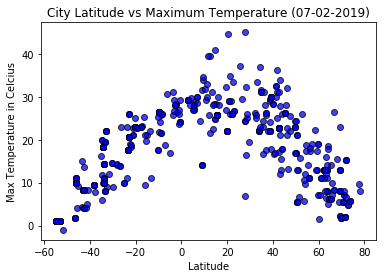

In [12]:
from datetime import datetime
today = datetime.today().strftime('%m-%d-%Y')
#Plot of Latitude vs. Temperature Plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
# Add labels to the x and y axes
plt.title("City Latitude vs Maximum Temperature (" + today + ")")
plt.ylabel("Max Temperature in Celcius")
plt.xlabel("Latitude")

# Save the plot and display it
plt.savefig("../Images/CityLatVsTemp.png")
plt.show()

### Latitude vs. Humidity Plot


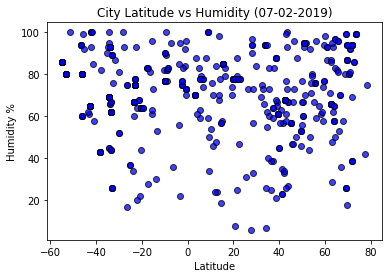

In [21]:
#Clean the data - remove humidy > 100%
weather_data[weather_data.Humidity >  100.0]
weather_data = weather_data[weather_data['Humidity'] < 101]
#Plot of Latitude vs. Humidity Plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
# Add labels to the x and y axes
plt.title("City Latitude vs Humidity (" + today + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

# Save the plot and display it
plt.savefig("../Images/CityLatVsHumidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

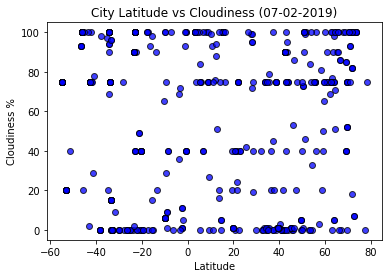

In [22]:
#Plot of Latitude vs. Cloudiness Plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
# Add labels to the x and y axes
plt.title("City Latitude vs Cloudiness (" + today + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")

# Save the plot and display it
plt.savefig("../Images/CityLatVsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

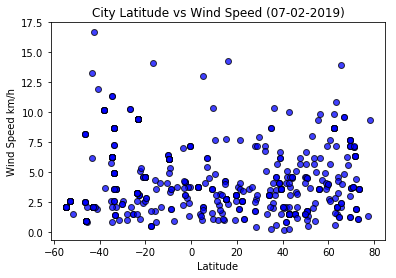

In [24]:
#Plot of Latitude vs. Wind Speed Plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
# Add labels to the x and y axes
plt.title("City Latitude vs Wind Speed (" + today + ")")
plt.ylabel("Wind Speed km/h")
plt.xlabel("Latitude")

# Save the plot and display it
plt.savefig("../Images/CityLatVsWindSpeed.png")
plt.show()